<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/Boosting/Gradient_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
x, y = make_circles(n_samples=750, factor=0.4, noise=0.3, random_state=1)

In [34]:
idx = np.sort(np.append(np.where(y == 1)[0], np.where(y == 0)[0][:-50]))
x, y = x[idx], y[idx]

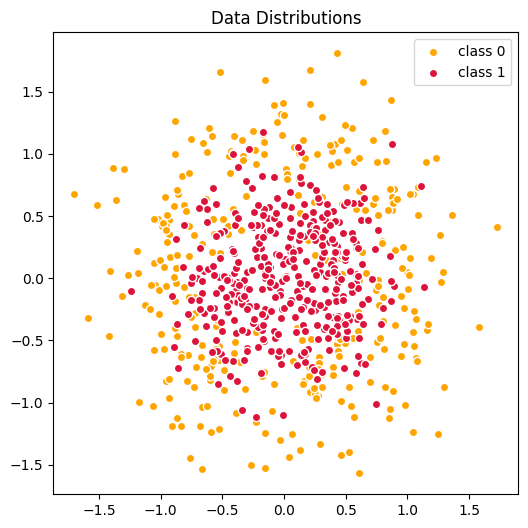

In [35]:
plt.figure(figsize=(6, 6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], c='orange', label='class 0', edgecolors='w')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c = 'crimson', label='class 1', edgecolors='w')
plt.legend()
plt.title('Data Distributions')
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
y_pred = clf.predict(x_test)

In [39]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy :  0.7928571428571428
Confusion Matrix
[[48 11]
 [18 63]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        59
           1       0.85      0.78      0.81        81

    accuracy                           0.79       140
   macro avg       0.79      0.80      0.79       140
weighted avg       0.80      0.79      0.79       140



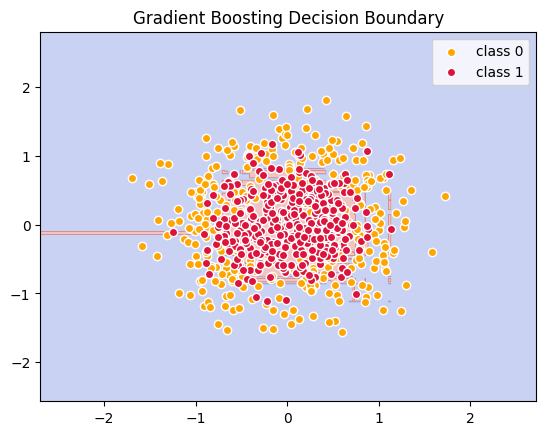

In [40]:
def plot_decision_boundary(model, x, y):
  h = 0.01 #it is the step size, smaller h = higher resolution = slower but smoother plot

  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)

  plt.contourf(xx, yy, z, alpha=0.3, cmap='coolwarm')
  plt.scatter(x[y == 0, 0], x[y == 0, 1], c='orange', edgecolors='white', label='class 0')
  plt.scatter(x[y == 1, 0], x[y == 1, 1], c='crimson', edgecolors='white', label='class 1')
  plt.legend()
  plt.title('Gradient Boosting Decision Boundary')
  plt.show()

plot_decision_boundary(clf, x, y)